In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable



# Coursera’s Global  AI Skills Index report - the insights you want to know.


The Coursera Global Skills Index (GSI) draws upon this rich data to benchmark 60 countries and 10 industries across Business, Technology, and Data Science skills to reveal skills development trends around the world.

Coursera measures the skill proficiency of countries in AI overall and in the related skills of :

Math : is the study of numbers and their relationships as well as applying these principles to models of real phenomena. (Sample skills: calculus, linear algebra)

Machine learning : creates algorithms and statistical models that computer systems can use to perform a specific task without explicit instructions. (Sample skills: neural networks, natural language processing)

Statistics : deals with all aspects of data collection, organization, analysis, interpretation, and presentation. (Sample skills: linear regression, AB testing)

Statistical programming : is the set of programming languages and tools used to create statistical models and algorithms. (Sample skills: R, Python)

Software engineering : involves the design, development, maintenance, testing, and evaluation of computer software. (Sample skills: software development, algorithms)



In [8]:
coursera_AI = pd.read_csv('../Data programming/Coursera AI Percentile and Category.csv')
coursera_AI.head()

,country,iso3,region,incomegroup,iso,competency_id,percentile_rank,percentile_category
0,United Arab Emirates,ARE,Middle East & North Africa,High income,AE,statistical-programming,0.864407,Cutting-edge (75%-100%)
1,United Arab Emirates,ARE,Middle East & North Africa,High income,AE,statistics,0.237288,Lagging (0-25%)
2,United Arab Emirates,ARE,Middle East & North Africa,High income,AE,machine-learning,0.355932,Emerging (25%-50%)
3,United Arab Emirates,ARE,Middle East & North Africa,High income,AE,software-engineering,0.322034,Emerging (25%-50%)
4,United Arab Emirates,ARE,Middle East & North Africa,High income,AE,fields-of-mathematics,0.491525,Emerging (25%-50%)


In [9]:
coursera_AI.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              360 non-null    object 
 1   iso3                 360 non-null    object 
 2   region               360 non-null    object 
 3   incomegroup          360 non-null    object 
 4   iso                  360 non-null    object 
 5   competency_id        360 non-null    object 
 6   percentile_rank      360 non-null    float64
 7   percentile_category  360 non-null    object 
dtypes: float64(1), object(7)
memory usage: 22.6+ KB


# Overview of the dataset

In [10]:
income = coursera_AI.groupby(['incomegroup',])['country'].size() #

income     

incomegroup
High income            192
Lower middle income     60
Upper middle income    108
Name: country, dtype: int64

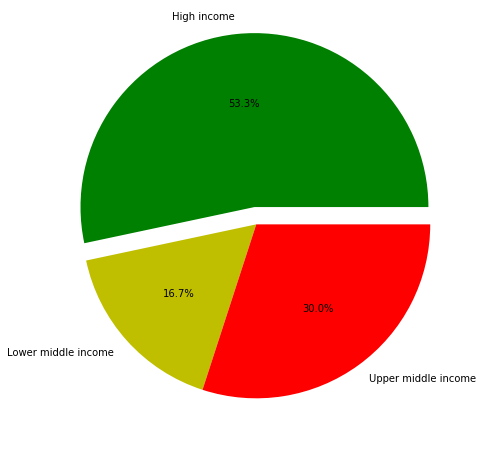

In [11]:
plt.figure(figsize = (8,8)) # then make the size of 3 
label = ['High income','Lower middle income','Upper middle income'] 
                                                                    
values = [192,60,108]   
explode = [0.1,0,0] 
color = ['g','y','r'] 

plt.pie(values,labels = label,autopct = "%.1f%%",explode = explode, colors = color)
plt.show()

In [12]:
counts = coursera_AI.drop_duplicates('country').groupby('region').size()
counts


region
East Asia & Pacific           13
Europe & Central Asia         24
Latin America & Caribbean     11
Middle East & North Africa     4
North America                  2
South Asia                     3
Sub-Saharan Africa             3
dtype: int64

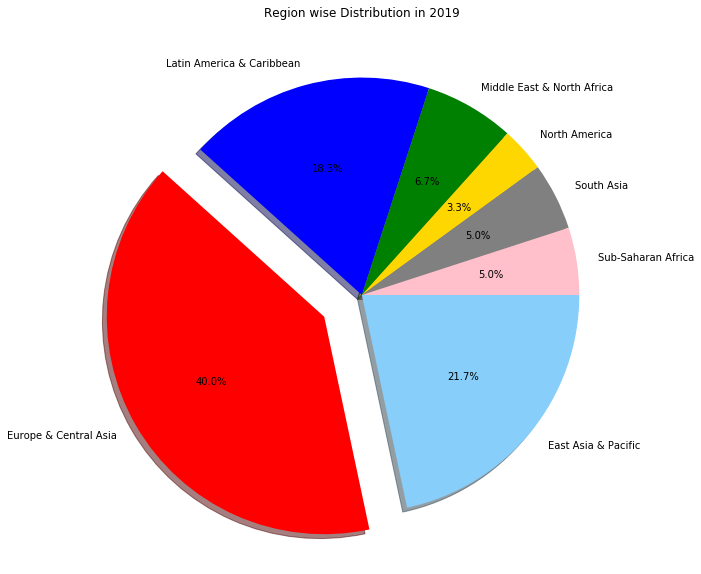

In [13]:

counts = coursera_AI.drop_duplicates('country').groupby('region').size()
labels = counts.index
values = counts.values
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','grey','pink'] 
explode = (0, 0.2, 0, 0, 0, 0,0)
plt.figure(figsize = (10,10)) 
plt.pie(values,  labels=labels,colors= colors,explode = explode,autopct='%1.1f%%', counterclock=False, shadow=True)


plt.title('Region wise Distribution in 2019')
plt.show()

In [404]:
d3=coursera_AI.groupby(['country','incomegroup'])['percentile_rank'].sum().reset_index()

df_3 = d3.sort_values(by=['percentile_rank'],ascending= False).reset_index()

df_3_temp= df_3.iloc[0:10]

cnt = df_3_temp['country']
print(cnt)


0           Switzerland
1    Russian Federation
2               Finland
3               Germany
4               Belgium
5               Belarus
6           Netherlands
7                Sweden
8                France
9        Czech Republic
Name: country, dtype: object


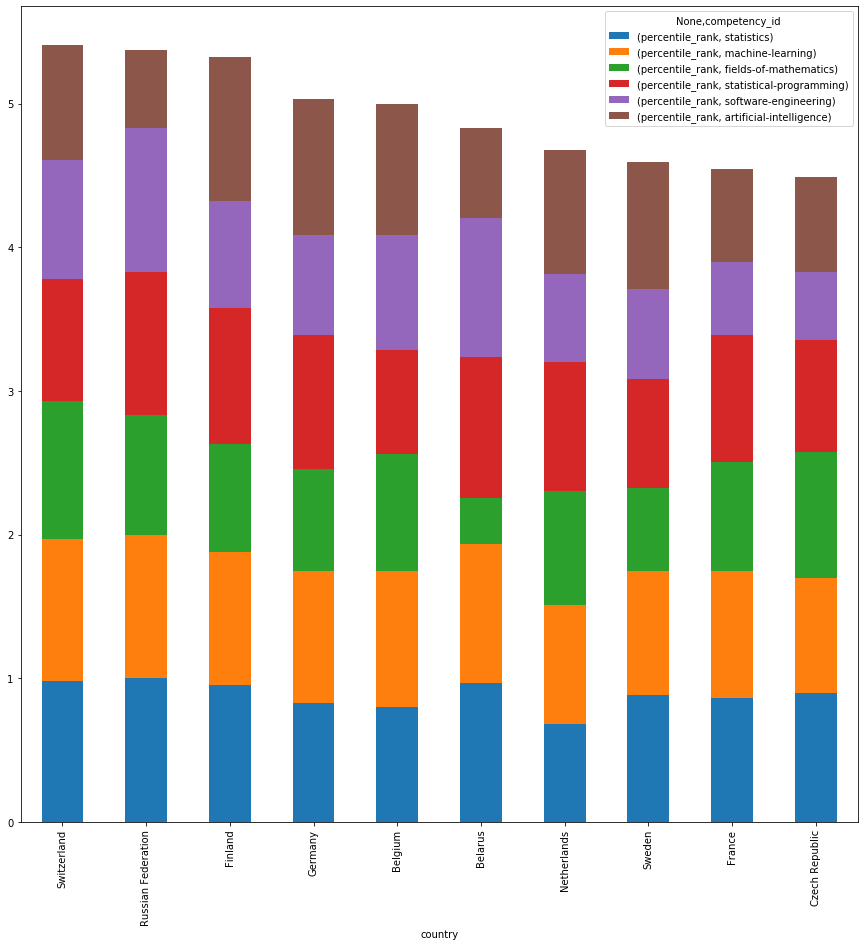

In [403]:
cntGroups = coursera_AI.groupby(['country'])          
topTenCnt = DataFrame()                          
for i in range(0, len(cnt)):
    
    storeTemp = cntGroups.get_group(cnt[i])
    topTenCnt = pd.concat([topTenCnt,storeTemp])   
                                                 
topTenCntCateory= topTenCnt.groupby(['country','competency_id'],sort=False).sum()  

my_plot = topTenCntCateory.unstack().plot(kind='bar',stacked=True,figsize = (15,15)) 

Lets identify countries leading in different AI skills.
Hence,we create different data frames based on 'competency ids' which will be utilized later to sort the data.

In [14]:
df_AI = coursera_AI[coursera_AI['competency_id'] == 'artificial-intelligence']
df_Stats_prog = coursera_AI[coursera_AI['competency_id'] == 'statistical-programming']
df_Stats = coursera_AI[coursera_AI['competency_id'] == 'statistics']
df_SE = coursera_AI[coursera_AI['competency_id'] == 'software-engineering']
df_Math = coursera_AI[coursera_AI['competency_id'] == 'fields-of-mathematics']
df_ML = coursera_AI[coursera_AI['competency_id'] == 'machine-learning']



We define a function which will help us sort our dataframes based on top 5 leading countries in each percentile category

In [15]:
def skillsData(selectedSkills):
    dataF = selectedSkills.groupby(['percentile_category','country'])['percentile_rank'].apply(lambda x : x.min()).to_frame()
    
    return dataF.sort_values('percentile_rank',ascending=False).groupby(level=0).head(5)

In [210]:
skillsData(df_SE)

percentile_rank
percentile_category     country                            
Cutting-edge (75%-100%) Russian Federation         1.000000
                        Brazil                     0.983051
                        Belarus                    0.966102
                        Canada                     0.949153
                        Hungary                    0.932203
Competitive (50%-75%)   Finland                    0.745763
                        Portugal                   0.728814
                        Romania                    0.711864
                        Germany                    0.694915
                        Ecuador                    0.677966
Emerging (25%-50%)      Ireland                    0.491525
                        Czech Republic             0.474576
                        Colombia                   0.457627
                        Japan                      0.440678
                        Mexico                     0.423729
Lagging (0-25%)         Vietnam                    0.237288
                        United States              0.220339
                        Singapore                  0.203390
                        Malaysia                   0.186441
                        Hong Kong                  0.169492

Now it is time to visualize our data. To do so we need a shape file of wolrd map. The shapefile consists of many columns, of which only 3 are of any interest to us. The columns are renamed for easy referencing.

In [16]:
worldmap = gpd.read_file(r'C:\Users\Max\Desktop\Data programming\data\ne_110m_admin_0_countries')[['ADMIN', 'ADM0_A3', 'geometry']]
worldmap.columns = ['country', 'country_code', 'geometry']
worldmap.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."




Since we don't need the Antarctica we will drop it from the file


In [17]:
print(worldmap[worldmap['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
worldmap = worldmap.drop(worldmap.index[159])

        country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  


# Static choropleth map for AI skill index

Let us first create a static map representing AI index which combines all proficiency skills. 

In [18]:
merged = worldmap.merge(df_AI, left_on ='country_code', right_on='iso3',how='left')
merged.fillna('No data', inplace = True)
merged


,country_x,country_code,geometry,country_y,iso3,region,incomegroup,iso,competency_id,percentile_rank,percentile_category
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",No data,No data,No data,No data,No data,No data,No data,No data
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",No data,No data,No data,No data,No data,No data,No data,No data
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",No data,No data,No data,No data,No data,No data,No data,No data
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,North America,High income,CA,artificial-intelligence,0.559322,Competitive (50%-75%)
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,USA,North America,High income,US,artificial-intelligence,0.813559,Cutting-edge (75%-100%)
...,...,...,...,...,...,...,...,...,...,...,...
171,Republic of Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",No data,No data,No data,No data,No data,No data,No data,No data
172,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",No data,No data,No data,No data,No data,No data,No data,No data
173,Kosovo,KOS,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",No data,No data,No data,No data,No data,No data,No data,No data
174,Trinidad and Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",No data,No data,No data,No data,No data,No data,No data,No data


In [22]:
import json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [23]:
from bokeh.io import output_notebook, show, output_file
from bokeh.models import Slider, HoverTool
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer


#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['Paired'][12]

#Reverse color order so that light blue is highest skill index.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 1)

#Define custom tick labels for color bar.
tick_labels = {'0':'0', '0.2':'0.2',  '0.4':'0.4', '0.6':'0.6', '0.8':'0.8', '1':'1'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper,title = "Skill Index(1 is the highest)", label_standoff=8,width = 500, height = 20,border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'AI Skill Index', plot_height = 500 , plot_width = 850, toolbar_location = None,tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None


#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'percentile_rank', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.5, fill_alpha = 1)

#Add hover tool
hover = HoverTool(tooltips = [ ('country_x','@country_x'),('percentile_rank', '@percentile_rank'),('percentile_category','@percentile_category')])

#Specify figure layout.
p.add_layout(color_bar, 'below')


#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p)




NameError: name 'hover' is not defined

We will define a few functions and reuse a major chunk of code written for creating the static map.




In [24]:
def map_data(df_selected, titleName):
    
    merged = worldmap.merge(df_selected, left_on ='country_code', right_on='iso3',how='left')
    merged.fillna('No data', inplace = True)
    merged_json = json.loads(merged.to_json())
    json_data = json.dumps(merged_json)
    
    #Input GeoJSON source that contains features for plotting.
    geosource = GeoJSONDataSource(geojson = json_data)

    #Define a sequential multi-hue color palette.
    palette = brewer['Paired'][12]

    #Reverse color order so that light blue is highest skill index.
    palette = palette[::-1]

    #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
    color_mapper = LinearColorMapper(palette = palette, low = 0, high = 1)
    

    #Define custom tick labels for color bar.
    tick_labels = {'0':'0', '0.2':'0.2',  '0.4':'0.4', '0.6':'0.6', '0.8':'0.8', '1':'1'}
    
    #Add hover tool
    hover = HoverTool(tooltips = [ ('country_x','@country_x'),('percentile_rank', '@percentile_rank'),('percentile_category','@percentile_category')])

    #Create color bar. 
    color_bar = ColorBar(color_mapper=color_mapper,title = "Skill Index(1 is the highest)", label_standoff=8,width = 500, height = 20,border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
    
    
    #Create figure object.
    p = figure(title = titleName, plot_height = 500 , plot_width = 850, toolbar_location = None,tools = [hover])
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None


    #Add patch renderer to figure. 
    p.patches('xs','ys', source = geosource,fill_color = {'field' :'percentile_rank', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.5, fill_alpha = 1)

    

    #Specify figure layout.
    p.add_layout(color_bar, 'below')


    #Display figure inline in Jupyter Notebook.
    output_notebook()

    #Display figure.
    show(p)

    


DataFrames  we have created before:
df_Stats_prog = coursera_AI[coursera_AI['competency_id'] == 'statistical-programming']
df_Stats = coursera_AI[coursera_AI['competency_id'] == 'statistics']
df_SE = coursera_AI[coursera_AI['competency_id'] == 'software-engineering']
df_Math = coursera_AI[coursera_AI['competency_id'] == 'fields-of-mathematics']
df_ML = coursera_AI[coursera_AI['competency_id'] == 'machine-learning']

# Machine Learning Skill Index in 2019

In [25]:
titleName = 'Machine Learning'
map_data(df_ML,titleName)

Loading BokehJS ...

# Investment in AI

In [26]:
inv = pd.read_csv('../Data programming/Investment Activity report.csv')
inv

,Country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Grand Total,2018+2019
0,United States,260843033.0,6.736786e+08,4.170024e+09,1.581462e+09,2.451413e+09,5.758628e+09,5.707028e+09,8.295446e+09,1.238838e+10,1.870316e+10,1.761598e+10,7.760604e+10,"$36,319,141,677.00"
1,China,6407959.0,4.524669e+08,1.884800e+08,4.172943e+09,5.615563e+08,5.924790e+08,1.555910e+09,5.697625e+09,6.152114e+09,1.435904e+10,1.062122e+10,4.436024e+10,"$24,980,260,164.00"
2,United Kingdom,18791468.0,3.325474e+07,2.900732e+07,4.369463e+07,8.547682e+07,1.069089e+08,3.109328e+08,7.439085e+08,1.066648e+09,1.269668e+09,1.665246e+09,5.373538e+09,"$2,934,914,245.00"
3,Israel,2500000.0,1.181201e+07,6.285000e+07,4.378394e+07,6.241000e+07,9.993132e+07,2.558411e+08,5.202891e+08,6.719566e+08,1.044352e+09,1.257245e+09,4.032972e+09,"$2,301,597,565.00"
4,Canada,5509680.0,2.498826e+07,1.582312e+07,7.770326e+07,2.947660e+07,1.952563e+08,1.190041e+08,1.729166e+08,4.097582e+08,7.959576e+08,1.174144e+09,3.020538e+09,"$1,970,102,071.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Peru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.600000e+05,6.600000e+05,"$660,000.00"
81,Haiti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.491180e+05,NaN,NaN,NaN,5.491180e+05,$-
82,El Salvador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+05,NaN,5.000000e+05,"$500,000.00"
83,Morocco,NaN,NaN,NaN,4.076830e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.076830e+05,$-


In [27]:
df = inv.drop(inv.index[84])
df


,Country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Grand Total,2018+2019
0,United States,260843033.0,673678558.0,4.170024e+09,1.581462e+09,2.451413e+09,5.758628e+09,5.707028e+09,8.295446e+09,1.238838e+10,1.870316e+10,1.761598e+10,7.760604e+10,"$36,319,141,677.00"
1,China,6407959.0,452466870.0,1.884800e+08,4.172943e+09,5.615563e+08,5.924790e+08,1.555910e+09,5.697625e+09,6.152114e+09,1.435904e+10,1.062122e+10,4.436024e+10,"$24,980,260,164.00"
2,United Kingdom,18791468.0,33254736.0,2.900732e+07,4.369463e+07,8.547682e+07,1.069089e+08,3.109328e+08,7.439085e+08,1.066648e+09,1.269668e+09,1.665246e+09,5.373538e+09,"$2,934,914,245.00"
3,Israel,2500000.0,11812013.0,6.285000e+07,4.378394e+07,6.241000e+07,9.993132e+07,2.558411e+08,5.202891e+08,6.719566e+08,1.044352e+09,1.257245e+09,4.032972e+09,"$2,301,597,565.00"
4,Canada,5509680.0,24988258.0,1.582312e+07,7.770326e+07,2.947660e+07,1.952563e+08,1.190041e+08,1.729166e+08,4.097582e+08,7.959576e+08,1.174144e+09,3.020538e+09,"$1,970,102,071.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.350000e+05,7.350000e+05,"$735,000.00"
80,Peru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.600000e+05,6.600000e+05,"$660,000.00"
81,Haiti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.491180e+05,NaN,NaN,NaN,5.491180e+05,$-
82,El Salvador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+05,NaN,5.000000e+05,"$500,000.00"


In [28]:

funds=df[['Country','2017','2018','2019','Grand Total']].head(10)

funds.sort_values(by = ['Grand Total'],ascending = False)



,Country,2017,2018,2019,Grand Total
0,United States,1.238838e+10,1.870316e+10,1.761598e+10,7.760604e+10
1,China,6.152114e+09,1.435904e+10,1.062122e+10,4.436024e+10
2,United Kingdom,1.066648e+09,1.269668e+09,1.665246e+09,5.373538e+09
3,Israel,6.719566e+08,1.044352e+09,1.257245e+09,4.032972e+09
4,Canada,4.097582e+08,7.959576e+08,1.174144e+09,3.020538e+09
5,France,2.945236e+08,7.442421e+08,7.277435e+08,2.700434e+09
6,Japan,2.576198e+08,5.956277e+08,5.645370e+08,2.246264e+09
7,Germany,3.147075e+08,3.523160e+08,5.582587e+08,1.771177e+09
8,Hong Kong,1.825000e+07,1.378354e+08,8.196607e+07,1.673924e+09
9,India,1.735770e+08,2.795034e+08,5.697212e+08,1.374857e+09


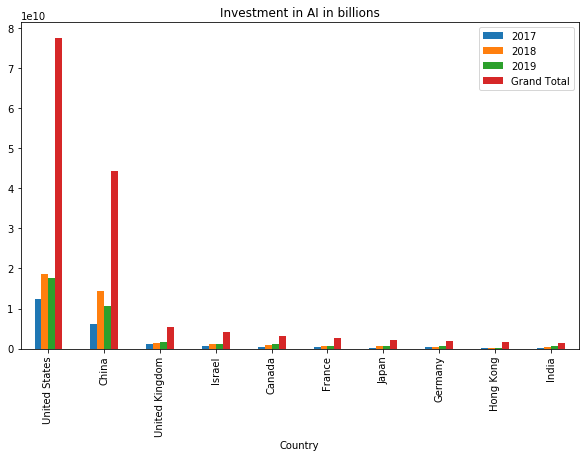

In [383]:
funds.plot.bar(x="Country",y=['2017', '2018','2019',"Grand Total"],title = "Investment in AI in billions",figsize=(10,6))

